In [18]:
import matplotlib.pyplot as plt 
import pandas as pd

office = pd.read_csv('the_office_series.csv')
plt.rcParams['figure.figsize'] = [11, 7]

office['Has_Guests'] = ['False' if datas  else 'True' for datas in office['GuestStars'].isna()]
office['scaled_ratings'] = office['Ratings'] / 10

print(office.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      188 non-null    int64  
 1   Season          188 non-null    int64  
 2   EpisodeTitle    188 non-null    object 
 3   About           188 non-null    object 
 4   Ratings         188 non-null    float64
 5   Votes           188 non-null    int64  
 6   Viewership      188 non-null    float64
 7   Duration        188 non-null    int64  
 8   Date            188 non-null    object 
 9   GuestStars      29 non-null     object 
 10  Director        188 non-null    object 
 11  Writers         188 non-null    object 
 12  Has_Guests      188 non-null    object 
 13  scaled_ratings  188 non-null    float64
dtypes: float64(3), int64(4), object(7)
memory usage: 20.7+ KB
None


In [5]:
color = []

for r in office['scaled_ratings']:
    if r < 0.25:
      color.append('red')
    elif r  < 0.50:
      color.append('orange')
    elif r < 0.75:
      color.append('lightgreen')
    else:
        color.append('darkgreen')

In [12]:
size = []
for row in office['Has_Guests']:
    if row == 'False':
        size.append(25)
    else:
        size.append(250)



In [28]:
office['color'] = color
office['size']  = size


In [33]:
with_guests = office[office['Has_Guests'] == 'True']
without_guests = office[office['Has_Guests'] == 'False']


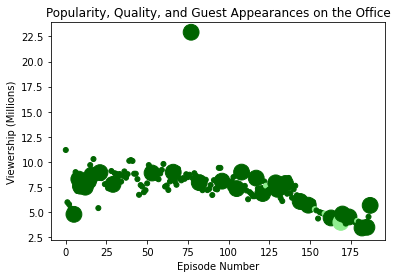

In [16]:
fig =  plt.figure()

plt.scatter(x=office.iloc[:,0], y= office['Viewership'],
            c = color,
            s = size
            )

plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.show()

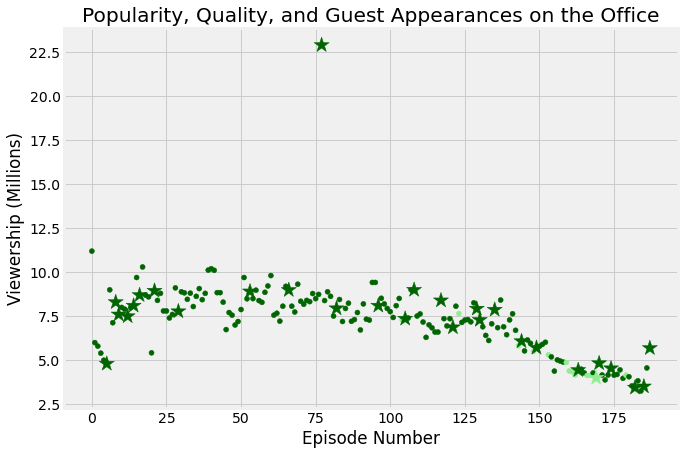

In [40]:
fig =  plt.figure()
plt.style.use('fivethirtyeight')

plt.scatter(x=without_guests.iloc[:,0], y= without_guests['Viewership'],
            c = without_guests['color'],
            s = without_guests['size']
            )

plt.scatter(x=with_guests.iloc[:,0], y= with_guests['Viewership'],
            c = with_guests['color'],
            s = with_guests['size'],
            marker = "*"
            )

plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.show()

In [41]:
office[office['Viewership'] == office['Viewership'].max()]['GuestStars ']

77    Cloris Leachman, Jack Black, Jessica Alba
Name: GuestStars, dtype: object

In [ ]:
top_star = 'Cloris Leachman'